# Desafio 2

## Conhecendo melhor nossa base de consumidores: qual estado possui os clientes com melhores pontuações de crédito?

### Objetivo

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. 
Para realizar a verificação inicial, precisamos de alguns valores.
Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

### Detalhes

A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset.
O arquivo para submissão deve estar em formato json, conforme o arquivo exemplo "submission.json".

**OBSERVAÇÃO:**  É recomendado utilizar Python e pandas para esse desafio, mas também é possível utilizar outras ferramentas e linguagens de programação.

Descrição dos dados: <br/>
* `id`: Identificador do cliente <br/>
* `sobrenome`: Sobrenome do cliente <br/>
* `pontuacao_credito`: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) <br/>
* `estado_residencia`: Estado de residência do cliente <br/>
* `genero`: Gênero do cliente <br/>
* `nivel_estabilidade`: Nível de estabilidade do cliente <br/>
* `saldo_conta`: Saldo disponível na conta do cliente <br/>
* `numero_produtos`: Número de produtos que o cliente consome <br/>
* `possui_cartao_de_credito`: Possui um cartão de crédito cadastrado <br/>
* `membro_ativo`: Membro acessa e consome frequentemente <br/>

Obs: Os dados são fictícios, mas tentam representar a realidade de uma base de clientes de um produto SaaS.

**Importando as bibliotecas usadas para realizar o deasfio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Exportando a base de dados**

In [2]:
consumer = pd.read_csv('desafio1.csv')

**Análise inical dos dados**

In [3]:
consumer.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
consumer.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [6]:
pivot_data = pd.DataFrame({'colunas': consumer.columns,
                           'tipos': consumer.dtypes,
                           'nulls': consumer.isna().sum(),
                           '% nulls': consumer.isna().sum() / consumer.shape[0]})

In [7]:
pivot_data

,colunas,tipos,nulls,% nulls
RowNumber,RowNumber,int64,0,0.0
id,id,object,0,0.0
sobrenome,sobrenome,object,0,0.0
pontuacao_credito,pontuacao_credito,int64,0,0.0
estado_residencia,estado_residencia,object,0,0.0
genero,genero,object,0,0.0
idade,idade,int64,0,0.0
nivel_estabilidade,nivel_estabilidade,int64,0,0.0
saldo_conta,saldo_conta,float64,0,0.0
numero_produtos,numero_produtos,int64,0,0.0


In [8]:
consumer['estado_residencia'].unique()

array(['SC', 'RS', 'PR'], dtype=object)

**Análise exploratoria dos dados**

<IPython.core.display.Javascript object>


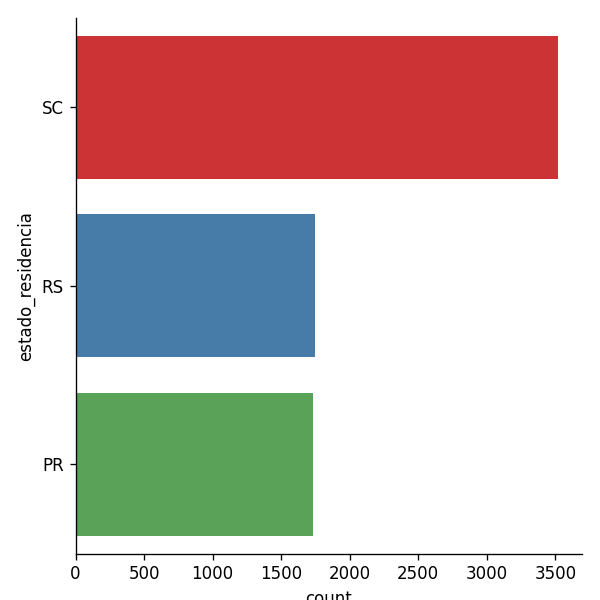

In [13]:
%matplotlib notebook
sns.catplot(y='estado_residencia', kind='count', palette='Set1', data=consumer)

<IPython.core.display.Javascript object>


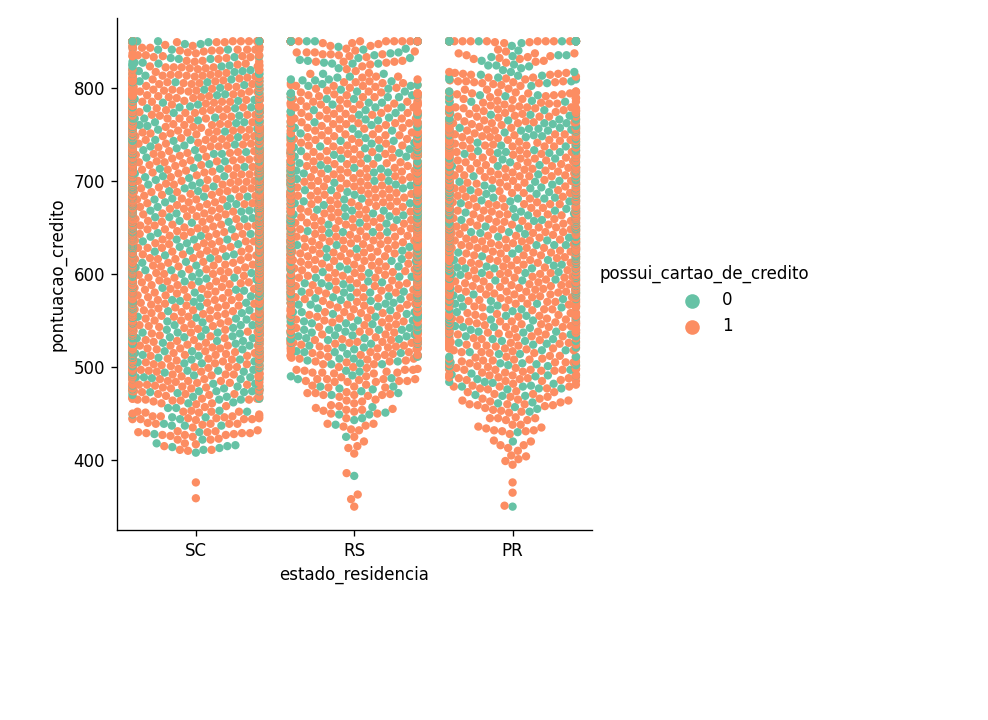

In [12]:
%matplotlib notebook
sns.catplot(x='estado_residencia', y='pontuacao_credito',
            hue='possui_cartao_de_credito', kind='swarm', palette='Set2', data=consumer)

<IPython.core.display.Javascript object>


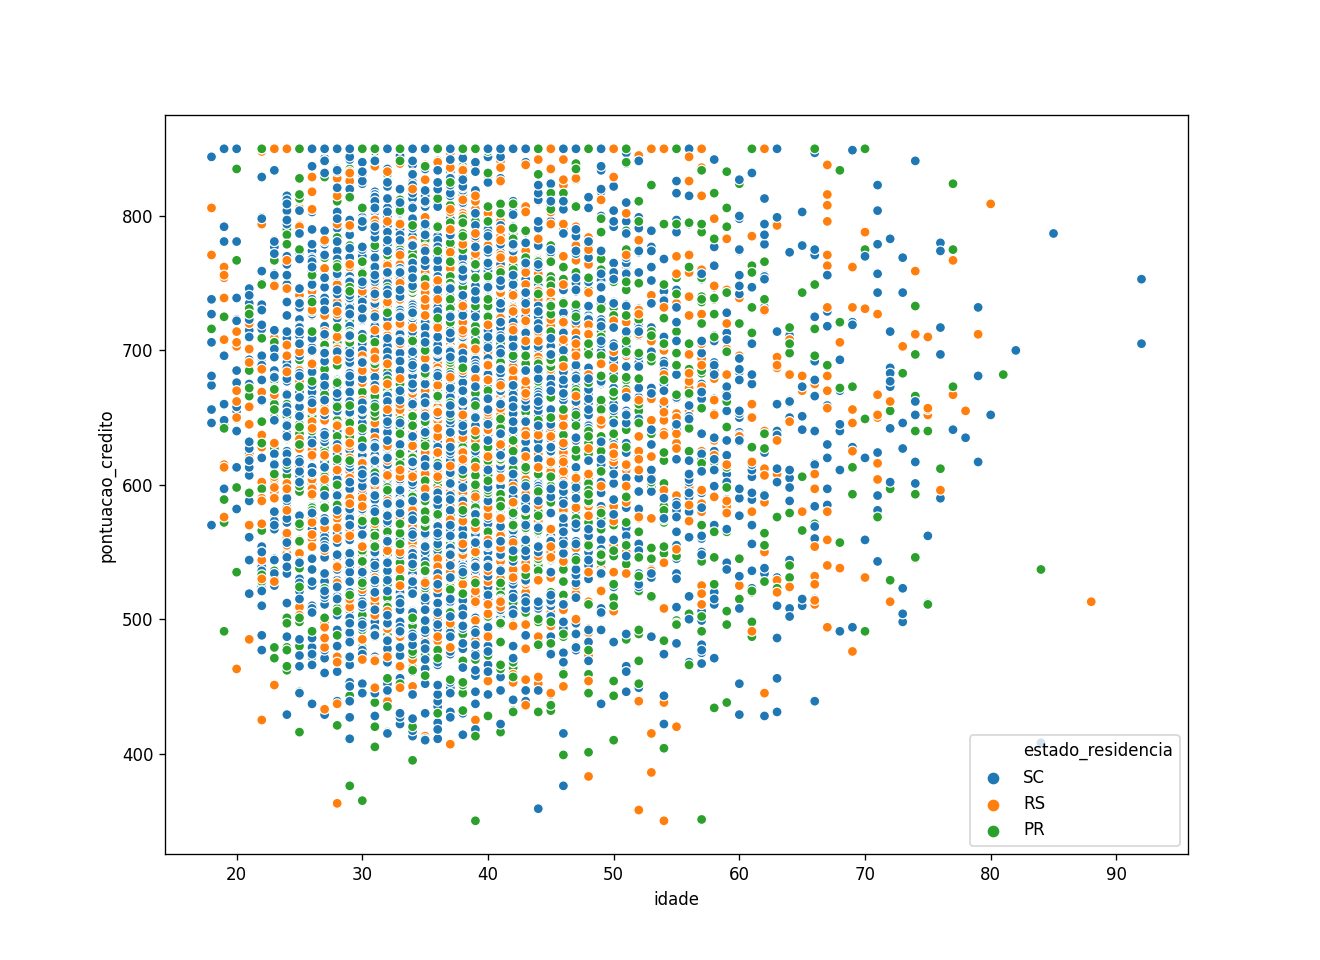

In [15]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x="idade", y="pontuacao_credito",
                hue="estado_residencia", data=consumer, sizes=(10000, 1000))

<IPython.core.display.Javascript object>


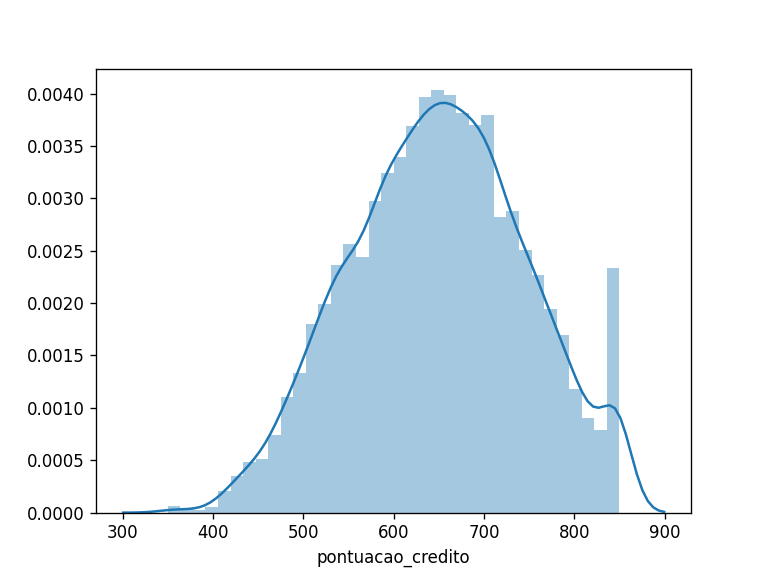

In [16]:
%matplotlib notebook
sns.distplot(consumer.pontuacao_credito)

**Verificando a correlação entre algumas variáveis**

In [17]:
features = ['pontuacao_credito', 'saldo_conta',
            'possui_cartao_de_credito', 'membro_ativo']
correlation = consumer[features].corr()
correlation

,pontuacao_credito,saldo_conta,possui_cartao_de_credito,membro_ativo
pontuacao_credito,1.000000,0.009761,-0.007987,0.033992
saldo_conta,0.009761,1.000000,-0.019398,-0.006482
possui_cartao_de_credito,-0.007987,-0.019398,1.000000,-0.014564
membro_ativo,0.033992,-0.006482,-0.014564,1.000000


<IPython.core.display.Javascript object>


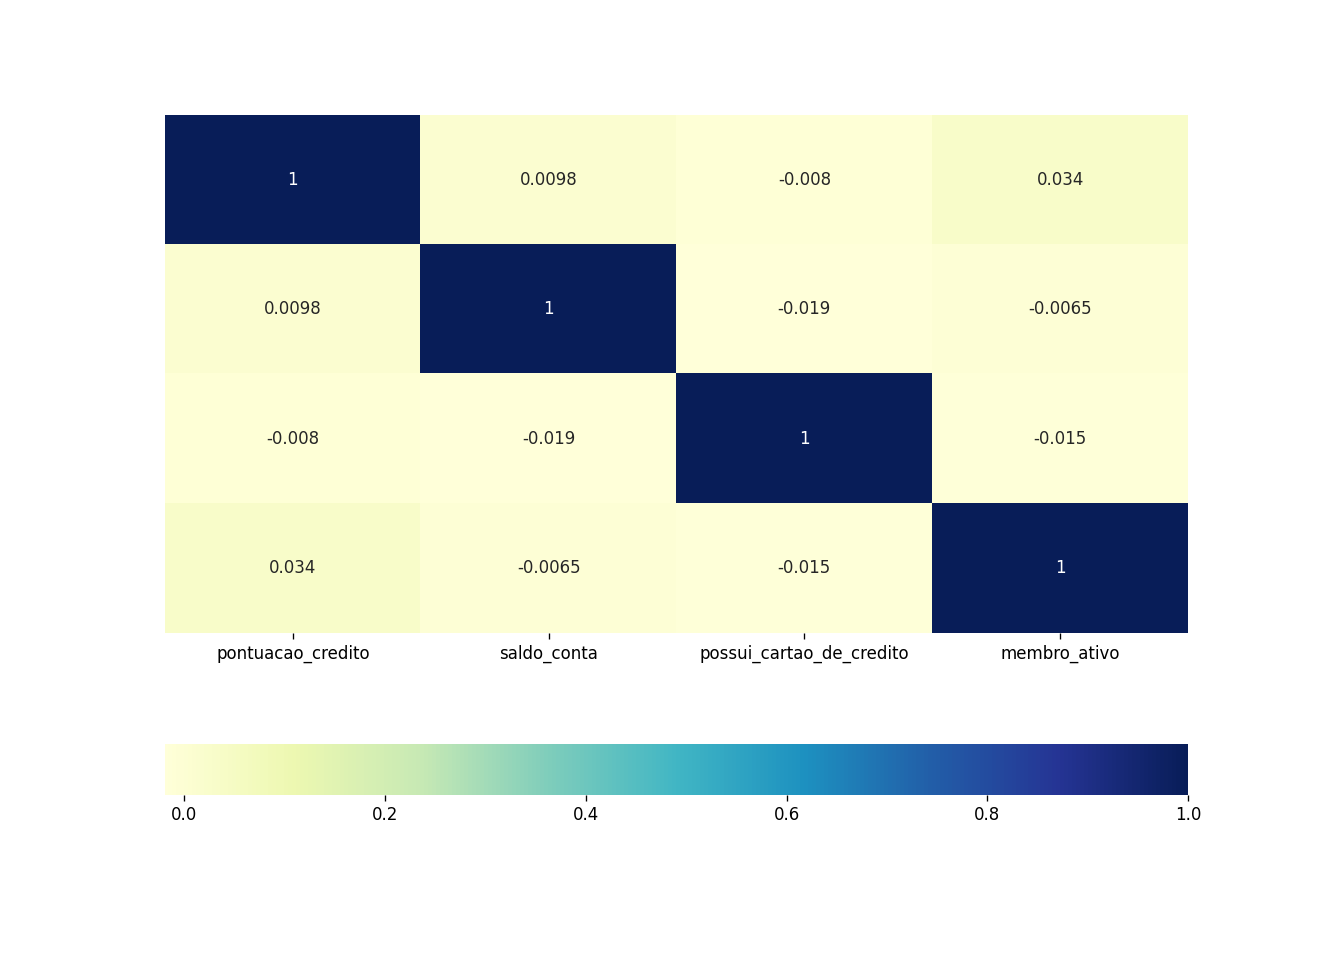

In [18]:
%matplotlib notebook
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(correlation, annot=True, yticklabels=False,
            cmap='YlGnBu', cbar_kws={"orientation": "horizontal"})

**Extraindo do dataframe a a média, a mediana, a moda e o desvio padrão da pontuação de crédito** 

In [220]:
answer = consumer.groupby('estado_residencia').agg(
    moda=pd.NamedAgg(column='pontuacao_credito', aggfunc=lambda x: x.mode()),
    mediana=pd.NamedAgg(column='pontuacao_credito', aggfunc='median'),
    media=pd.NamedAgg(column='pontuacao_credito', aggfunc='mean'),
    desvio_padrao=pd.NamedAgg(column='pontuacao_credito', aggfunc='std')
)

In [221]:
answer

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


**Resetando os indices e realizando o pivot do dataframe**

In [222]:
answer.reset_index(inplace=True)

In [223]:
answer = pd.pivot_table(answer, values=[
                        'moda', 'mediana', 'media', 'desvio_padrao'], columns='estado_residencia')

**Reordenando as colunas e linhas para seguir o padrão  do arquivo submission.json**

In [229]:
answer = answer.reindex(['SC', 'RS', 'PR'], axis=1)
answer = answer.reindex(['moda', 'mediana', 'media', 'desvio_padrao'])

In [230]:
answer

estado_residencia,SC,RS,PR
moda,850.000000,850.000000,850.000000
mediana,653.000000,650.000000,650.000000
media,649.537653,651.105143,648.961294
desvio_padrao,97.233493,95.136598,98.607186


**Gerando o arquivo json**

In [233]:
answer.to_json('submission.json')